<a href="https://colab.research.google.com/github/vijjipammi/pub/blob/main/TimeSeries_StockMarket_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TIME SERIES - Stock Market Prediction using LSTMs/RNN

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import os

## Download the Stock Data MSFT

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving MSFT (2).csv to MSFT (2).csv


In [ ]:
pip install yfinance

     |████████████████████████████████| 5.5MB 7.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=32b7c2eef01c8e928ddcd6e46f437dcdac8fa8dfe36cf3b27bfc51817abbf29e
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
# Get the data of the stock MSFT
df = yf.download('MSFT','2016-05-01','2020-11-30')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-05-02,50.000000,50.750000,49.779999,50.610001,46.514835,33114500
2016-05-03,50.340000,50.410000,49.599998,49.779999,45.751984,26460200
2016-05-04,49.840000,50.060001,49.459999,49.869999,45.834702,24257600
2016-05-05,49.869999,50.299999,49.730000,49.939999,45.899036,25390700
2016-05-06,49.919998,50.389999,49.660000,50.389999,46.312630,24787300


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### Uncomment below part if you are downloading the Data from Yahoo Website into MSFT.CSV

In [ ]:
#df = pd.read_csv('/content/MSFT.csv')

### Data Exploration
* We only will look at closing Price of the Stock

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-05-02,50.000000,50.750000,49.779999,50.610001,46.514835,33114500
2016-05-03,50.340000,50.410000,49.599998,49.779999,45.751984,26460200
2016-05-04,49.840000,50.060001,49.459999,49.869999,45.834702,24257600
2016-05-05,49.869999,50.299999,49.730000,49.939999,45.899036,25390700
2016-05-06,49.919998,50.389999,49.660000,50.389999,46.312630,24787300


In [ ]:
df.index

DatetimeIndex(['2016-05-02', '2016-05-03', '2016-05-04', '2016-05-05',
               '2016-05-06', '2016-05-09', '2016-05-10', '2016-05-11',
               '2016-05-12', '2016-05-13',
               ...
               '2020-11-13', '2020-11-16', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-27'],
              dtype='datetime64[ns]', name='Date', length=1154, freq=None)

In [ ]:
date_array=[]
for date in  df.index:
  date_array.append(date)

date_df = pd.DataFrame(date_array,index=df.index)
date_df.columns = ['Date']
df = pd.concat([df, date_df], axis=1, sort=False)


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2016-05-02,50.000000,50.750000,49.779999,50.610001,46.514835,33114500,2016-05-02
2016-05-03,50.340000,50.410000,49.599998,49.779999,45.751984,26460200,2016-05-03
2016-05-04,49.840000,50.060001,49.459999,49.869999,45.834702,24257600,2016-05-04
2016-05-05,49.869999,50.299999,49.730000,49.939999,45.899036,25390700,2016-05-05
2016-05-06,49.919998,50.389999,49.660000,50.389999,46.312630,24787300,2016-05-06


### 2.1. Plotting the Time-series

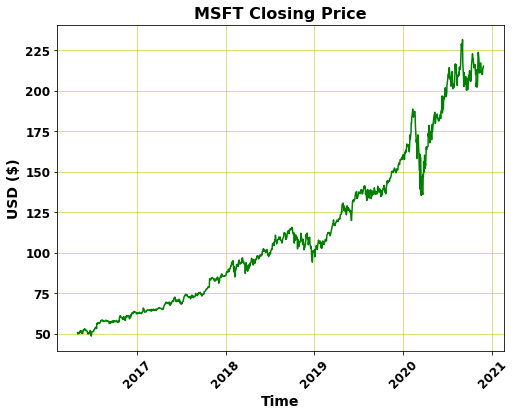

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(8, 6))
plt.plot(df['Close'], color='g')
plt.title('MSFT Closing Price', weight='bold', fontsize=16)
plt.xlabel('Time', weight='bold', fontsize=14)
plt.ylabel('USD ($)', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.5)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2016-05-02,50.000000,50.750000,49.779999,50.610001,46.514835,33114500,2016-05-02
2016-05-03,50.340000,50.410000,49.599998,49.779999,45.751984,26460200,2016-05-03
2016-05-04,49.840000,50.060001,49.459999,49.869999,45.834702,24257600,2016-05-04
2016-05-05,49.869999,50.299999,49.730000,49.939999,45.899036,25390700,2016-05-05
2016-05-06,49.919998,50.389999,49.660000,50.389999,46.312630,24787300,2016-05-06


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2020-11-20,212.199997,213.289993,210.000000,210.389999,210.389999,22829100,2020-11-20
2020-11-23,210.949997,212.289993,208.160004,210.110001,210.110001,25683500,2020-11-23
2020-11-24,209.589996,214.250000,208.860001,213.860001,213.860001,33979700,2020-11-24
2020-11-25,215.110001,215.289993,212.460007,213.869995,213.869995,21012900,2020-11-25
2020-11-27,214.850006,216.270004,214.039993,215.229996,215.229996,14512200,2020-11-27


## Train Upto a Fixed Date
* Here we want to Train Upto 30th October 2020
* We want to Predict after that



In [ ]:
train_end_date = pd.to_datetime('30-10-2020',utc=True)

In [ ]:
train_end_date

Timestamp('2020-10-30 00:00:00+0000', tz='UTC')

In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'],utc=True)    

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date,DateTime
Date,,,,,,,,
2016-05-02,50.000000,50.750000,49.779999,50.610001,46.514835,33114500,2016-05-02,2016-05-02 00:00:00+00:00
2016-05-03,50.340000,50.410000,49.599998,49.779999,45.751984,26460200,2016-05-03,2016-05-03 00:00:00+00:00
2016-05-04,49.840000,50.060001,49.459999,49.869999,45.834702,24257600,2016-05-04,2016-05-04 00:00:00+00:00
2016-05-05,49.869999,50.299999,49.730000,49.939999,45.899036,25390700,2016-05-05,2016-05-05 00:00:00+00:00
2016-05-06,49.919998,50.389999,49.660000,50.389999,46.312630,24787300,2016-05-06,2016-05-06 00:00:00+00:00


In [ ]:
df.index= range(len(df))


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date,DateTime
0,50.000000,50.750000,49.779999,50.610001,46.514835,33114500,2016-05-02,2016-05-02 00:00:00+00:00
1,50.340000,50.410000,49.599998,49.779999,45.751984,26460200,2016-05-03,2016-05-03 00:00:00+00:00
2,49.840000,50.060001,49.459999,49.869999,45.834702,24257600,2016-05-04,2016-05-04 00:00:00+00:00
3,49.869999,50.299999,49.730000,49.939999,45.899036,25390700,2016-05-05,2016-05-05 00:00:00+00:00
4,49.919998,50.389999,49.660000,50.389999,46.312630,24787300,2016-05-06,2016-05-06 00:00:00+00:00


In [ ]:
df[df['DateTime']>=train_end_date]

,Open,High,Low,Close,Adj Close,Volume,Date,DateTime
1134,203.500000,204.289993,199.619995,202.470001,201.941315,36953700,2020-10-30,2020-10-30 00:00:00+00:00
1135,204.289993,205.279999,200.119995,202.330002,201.801666,30842200,2020-11-02,2020-11-02 00:00:00+00:00
1136,203.889999,208.119995,203.119995,206.429993,205.890961,27512000,2020-11-03,2020-11-03 00:00:00+00:00
1137,214.020004,218.320007,212.419998,216.389999,215.824951,42311800,2020-11-04,2020-11-04 00:00:00+00:00
1138,222.039993,224.119995,221.149994,223.289993,222.706940,36080100,2020-11-05,2020-11-05 00:00:00+00:00
1139,222.259995,224.360001,218.029999,223.720001,223.135818,25231900,2020-11-06,2020-11-06 00:00:00+00:00
1140,224.440002,228.119995,217.880005,218.389999,217.819733,44395000,2020-11-09,2020-11-09 00:00:00+00:00
1141,214.500000,216.500000,209.720001,211.009995,210.459000,44045100,2020-11-10,2020-11-10 00:00:00+00:00
1142,212.389999,218.039993,212.199997,216.550003,215.984543,29440800,2020-11-11,2020-11-11 00:00:00+00:00
1143,217.210007,219.110001,214.460007,215.440002,214.877441,21593900,2020-11-12,2020-11-12 00:00:00+00:00


In [ ]:
train_data_index =1134

In [ ]:
len(df)

1154

## Pick the Stock Values to an Array and Scale it
* Use MinMax Scaler
* Generate X and y
* X will have 30 Values for one value of y

In [ ]:
Max_seq_len=30

stock_values=df['Close'].tolist()

In [ ]:
len(stock_values)

1154

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
stock_values=scaler.fit_transform(np.array(stock_values).reshape(-1,1))

In [ ]:
stock_values[0:10]

array([[0.01189827],
       [0.00736818],
       [0.0078594 ],
       [0.00824145],
       [0.01069752],
       [0.00895098],
       [0.01413601],
       [0.01429974],
       [0.01681038],
       [0.0144635 ]])

In [ ]:
stock_values.shape

(1154, 1)

## Generate X and y as Per TimeSeries Data


In [ ]:
X=[]
y=[]
for i in range(0, len(stock_values)-Max_seq_len):
    X.append(stock_values[i:i+Max_seq_len])
    y.append(stock_values[i+Max_seq_len])
    #print(stock_values[i:(i+Max_seq_len)])
    #print(stock_values[i+Max_seq_len])

In [ ]:
len(X)

1124

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
X.shape

(1124, 30, 1)

### LSTM Input Should be in the below format
* Num Samples X Sequence Length X Dimension/Features

In [ ]:
y.shape

(1124, 1)

### Select Test and Train Data
* We want to pick all Data upto 30th October 2020 as Train Data
* Remaining will be used as the Test Data
* Also note we need to subtract 30 from Train Dataindex that correspondds to 30th October as we lose first 30 indeces will computing X, y. As y starts only after first 30 values

In [ ]:
train_data_index=train_data_index-30

In [ ]:
X_train= X[0:train_data_index]

In [ ]:
y_train=y[0:train_data_index]

In [ ]:
X_test=X[train_data_index:]
y_test=y[train_data_index:]

In [ ]:
X_test.shape

(20, 30, 1)

In [ ]:
X_train.shape

(1104, 30, 1)

## Building the Network

In [ ]:
from keras.preprocessing import sequence 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM 

In [ ]:
model=Sequential()
model.add(LSTM(120,return_sequences=True, input_shape=(30,1)))
model.add(LSTM(120,return_sequences=True))
model.add(LSTM(120))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 120)           58560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 120)           115680    
_________________________________________________________________
lstm_2 (LSTM)                (None, 120)               115680    
_________________________________________________________________
dense (Dense)                (None, 1)                 121       
Total params: 290,041
Trainable params: 290,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,epochs=100,verbose=1, validation_data=(X_test,y_test))

Epoch 1/100
35/35 [==============================] - 3s 85ms/step - loss: 2.6031e-04 - val_loss: 0.0014
Epoch 2/100
35/35 [==============================] - 3s 86ms/step - loss: 2.8899e-04 - val_loss: 9.5375e-04
Epoch 3/100
35/35 [==============================] - 3s 87ms/step - loss: 2.6847e-04 - val_loss: 0.0013
Epoch 4/100
35/35 [==============================] - 3s 84ms/step - loss: 3.2503e-04 - val_loss: 9.4424e-04
Epoch 5/100
35/35 [==============================] - 3s 82ms/step - loss: 2.5397e-04 - val_loss: 0.0014
Epoch 6/100
35/35 [==============================] - 3s 84ms/step - loss: 2.9166e-04 - val_loss: 0.0016
Epoch 7/100
35/35 [==============================] - 3s 83ms/step - loss: 4.4134e-04 - val_loss: 8.9846e-04
Epoch 8/100
35/35 [==============================] - 3s 82ms/step - loss: 2.7811e-04 - val_loss: 0.0029
Epoch 9/100
35/35 [==============================] - 3s 85ms/step - loss: 3.9209e-04 - val_loss: 8.6945e-04
Epoch 10/100
35/35 [============================

In [ ]:
model.predict(X_test)

array([[0.8538484 ],
       [0.8513049 ],
       [0.85231686],
       [0.8706762 ],
       [0.9191212 ],
       [0.96314895],
       [0.969723  ],
       [0.93730646],
       [0.8914972 ],
       [0.90626544],
       [0.91908026],
       [0.9281357 ],
       [0.93211436],
       [0.9186608 ],
       [0.897155  ],
       [0.89672524],
       [0.89244443],
       [0.8902877 ],
       [0.9061534 ],
       [0.9125891 ]], dtype=float32)

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
y_train_before_transform=scaler.inverse_transform(y_train)
y_test_before_transform = scaler.inverse_transform(y_test)

In [ ]:
train_predict[0:5]

array([[51.78835 ],
       [51.2767  ],
       [50.848923],
       [50.740772],
       [50.75437 ]], dtype=float32)

In [ ]:
test_predict[0:5]

array([[204.87212],
       [204.40608],
       [204.59149],
       [207.9553 ],
       [216.83139]], dtype=float32)

In [ ]:
y_train_before_transform[0:5]

array([[49.83000183],
       [49.68999863],
       [50.38999939],
       [50.13000107],
       [50.06999969]])

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

121.59013698724513

In [ ]:
y_train.shape

(1104, 1)

In [ ]:
train_predict.shape

(1104, 1)

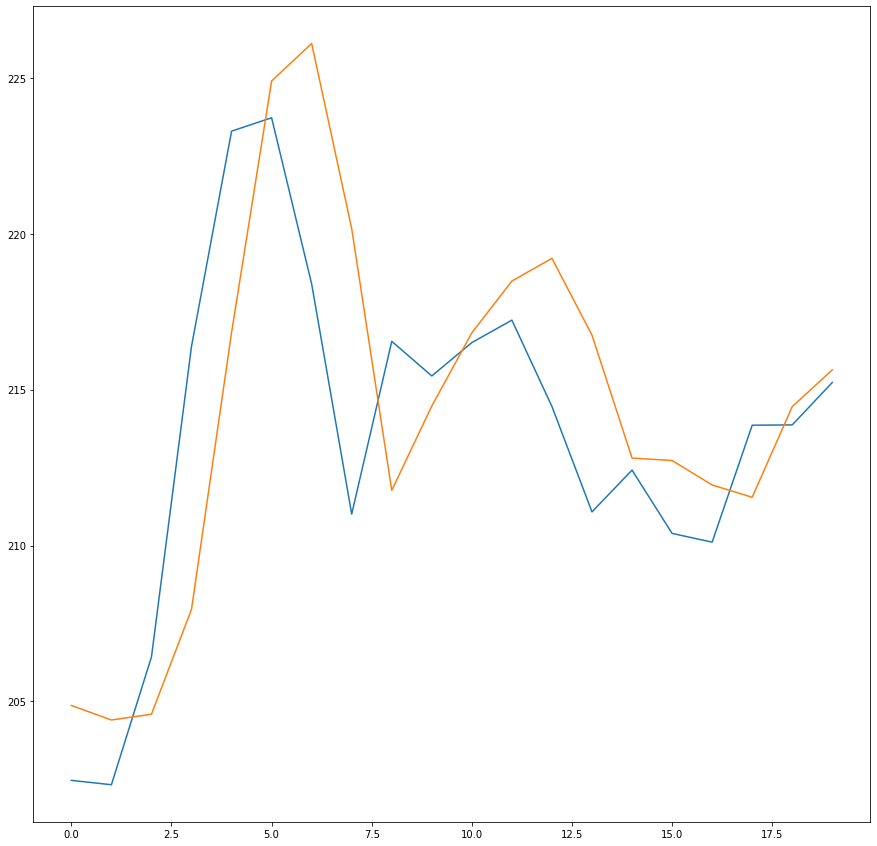

In [ ]:

plt.figure(figsize=(15,15))
plt.plot(y_test_before_transform)
plt.plot(test_predict)

plt.show()

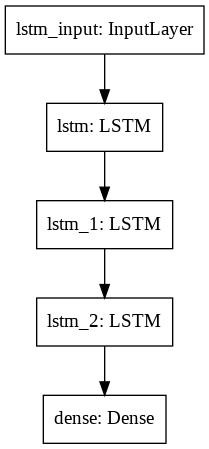

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)


## Assignments 3

* Stock Market Prediction - Choose Google Stock and rerun the Program

* Choose Max Seq Length to 20 and check the results

* Add/Delete an LSTM Layers and rerun the Program, change the Parameters and rerun the Program

